In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


# **Sentiment Analysis**

In [ ]:
import pandas as pd
# Load data and set labels
data = pd.read_csv("/content/gdrive/MyDrive/hichem_data/IMDB_Dataset/IMDB_Dataset.csv")

# Display dimensions of dataframe
print(data.shape)
print(data.info())

print("-----------------------------------------------------------------------")
# value_counts() function : Return a Series containing counts of unique values.
print("Sentiment        : \n",data["sentiment"].value_counts())

print("-----------------------------------------------------------------------")
# Display 10 random samples
print(data.sample(10))


(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
-----------------------------------------------------------------------
Sentiment        : 
 positive    25000
negative    25000
Name: sentiment, dtype: int64
-----------------------------------------------------------------------
                                                  review sentiment
30632  This movie doesn't even deserve a one. This wa...  negative
30778  I admit I go more for the traditional vampire ...  positive
8011   This one was truly awful. Watching with fascin...  negative
3977   Reeves plays Haji Murad, a hero in 1850's Russ...  negative
24744  One type of western I greatly enjoy is when th...  positive
3103   I don't know about the rest of the vie

In [ ]:
# Dropping the duplicate rows
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

data.drop_duplicates(inplace=True)
                     

number of duplicate rows :  (418, 2)


In [ ]:
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)


number of duplicate rows :  (0, 2)


SUM : 
 review       0
sentiment    0
dtype: int64


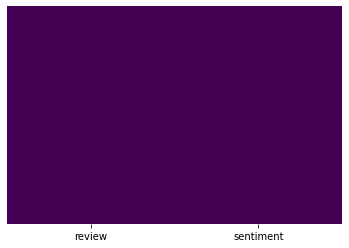

In [ ]:
# To check missing values
print("SUM : \n",data.isnull().sum())

import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# data["col"] = data["col"].fillna(df["col"].mean())
# data["col"] = data["col"].fillna(data["col"].interpolate())


In [ ]:
# Mapping of data feature values
data_copy = data.copy()
data_copy["sentiment"] = data_copy["sentiment"].map({"negative":0,"positive":1})

# Display 5 random samples
print(data_copy.sample(5))


                                                  review  sentiment
27173  Years ago, I caught a fairly well made TV movi...          0
47772  There's not much anyone can say about this fli...          1
39879  I mistakenly thought this was the 70's art fil...          0
23553  WARNING: SPOILERS Dear Roger,<br /><br />Durin...          0
21863  This film is bad, yes, but had the producers u...          0


In [ ]:
# X and Y for our data
X = data_copy["review"].values
y = data_copy["sentiment"].values
print("X: ",X.shape, " y: ",y.shape)

# shuffle the dataset
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

# Take a subset of dataset
from sklearn.model_selection import train_test_split
F0, new_data, L0, new_label = train_test_split(X, 
              y, test_size= 0.25, random_state=100, stratify=y)

print("new_data = ",new_data.shape ," new_label = ", new_label.shape)


X:  (49582,)  y:  (49582,)
new_data =  (12396,)  new_label =  (12396,)


In [ ]:
# In order to use this data for machine learning, we need to be able to convert 
# the content of each string into a vector of numbers. 
# For this we will use the TF-IDF vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(new_data)

texts = vec.transform(new_data).toarray()

print(" texts shape = ",texts.shape)


 texts shape =  (12396, 57147)


In [ ]:
# split the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(texts, new_label, 
                        test_size= 0.20, random_state=100, stratify=new_label)

print("X_train shape : ",X_train.shape, " y_train shape : ",y_train.shape)
print("X_test shape  : ",X_test.shape,  " y_test shape  : ",y_test.shape)


X_train shape :  (9916, 57147)  y_train shape :  (9916,)
X_test shape  :  (2480, 57147)  y_test shape  :  (2480,)


Classification report : 
 LogisticRegression(random_state=42) 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1235
           1       0.86      0.87      0.86      1245

    accuracy                           0.86      2480
   macro avg       0.86      0.86      0.86      2480
weighted avg       0.86      0.86      0.86      2480



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix: 
 [[1051  184]
 [ 156 1089]]


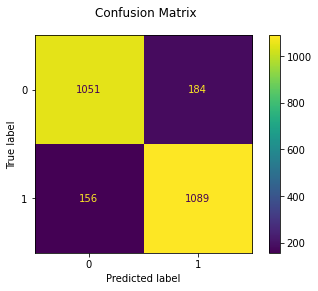

In [ ]:
# training the model on training set
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# classifier = MultinomialNB()
classifier = LogisticRegression(random_state=42)

classifier.fit(X_train, y_train)

# making predictions on the testing set 
predicted = classifier.predict(X_test)

from sklearn import metrics
print("Classification report : \n", classifier,"\n", 
      metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


Confusion matrix : 



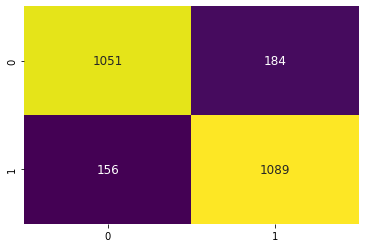

Normalized confusion matrix : 



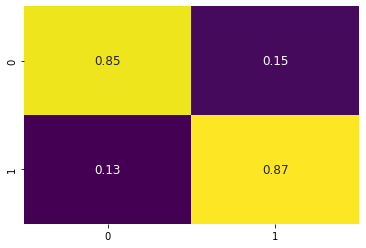

In [ ]:
# Function to draw confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, predicted)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, predicted,"true")


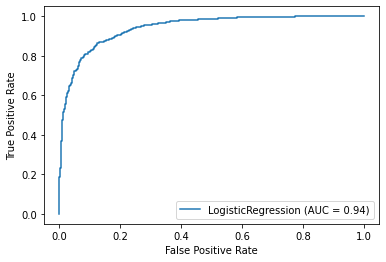

In [ ]:
# AUC-ROC curve (an evaluation metric for binary classification problems)
"""
AUC : The Area Under the Curve 
ROC : Receiver Characteristic Operator

AUC measures the entire two-dimensional area underneath the entire ROC curve 
(think integral calculus) from (0,0) to (1,1).

When AUC = 1, then the classifier is able to perfectly distinguish between all 
the Positive and the Negative class points correctly. If, however, the AUC had been 0, 
then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives
"""
from sklearn import metrics
disp = metrics.plot_roc_curve(classifier, X_test, y_test)

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

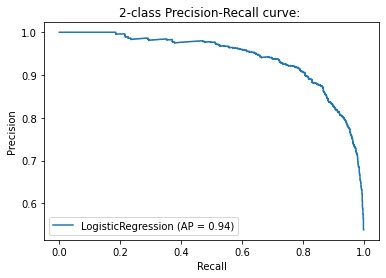

In [ ]:
"""
A system with high recall but low precision returns many results, 
but most of its predicted labels are incorrect when compared to the training labels.

A system with high precision but low recall is just the opposite, 
returning very few results, but most of its predicted labels are correct when 
compared to the training labels. 

An ideal system with high precision and high recall will return many results, 
with all results labeled correctly.

AP : average precision AP = SUMn((Rn - Rn-1) * Pn) 
"""
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title("2-class Precision-Recall curve: ")


# **Inference**

In [ ]:
!pip install gradio

     |████████████████████████████████| 979 kB 5.1 MB/s 
     |████████████████████████████████| 1.9 MB 7.2 MB/s 
     |████████████████████████████████| 206 kB 39.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 961 kB 37.0 MB/s 
     |████████████████████████████████| 3.6 MB 41.6 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=d66817435346b39343c83569c2408a316be15b0990969e9b6d94528331ba01bc
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=4ea2416b655ded0c079138fa761181ac014fba435834f0800219349ae3f55675
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
pred_sentences = ["This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good",
                  "One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie"]
texts_tst = vec.transform(pred_sentences).toarray()
predicted = classifier.predict_proba(texts_tst)
print(predicted)


[[0.29350006 0.70649994]
 [0.92062929 0.07937071]]


In [ ]:
# https://www.gradio.app/ml_examples
# examples : https://academichelp.net/samples/academics/reviews/movie/

import numpy as np
import gradio as gr
import requests

def inference(text):
  x = [text]
  my_text = vec.transform(x).toarray()
  predicted = classifier.predict_proba(my_text)

  labels = ["Negative","Positive"]
  dictionary = dict(zip(labels, map(float, predicted[0])))

  return dictionary


nbr_top_classes = 2
gr.Interface(fn=inference, 
             inputs="textbox", 
             outputs=gr.outputs.Label(num_top_classes=nbr_top_classes)).launch(share=True) #, debug=True Use in Colab


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://47678.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://47678.gradio.app')